In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

### In this notebook, we use k-means to explore different clusters under one category, and try to find the subcategories using unsupervised learning method

### Read the data

In [2]:
data_directory = "/Users/weiding/Google Drive/Application Project/data_after_preprocessing.csv"
data_all_category = pd.read_csv(data_directory, sep='\t')

### Select the data from one category, and print the distribution of the subcategory in that category

In [3]:
def content_selection(df_all_category, category):
    df = df_all_category[df_all_category['Category'] == category]
    df = df.dropna()
    print(df['IndustrySegment'].value_counts())
    return df

### Given a number k (for example 10) as the number of maximal clusters. The function explore and plot from 2 clusters to k clusters to find which number of clusters gives what sse score. The lower sse is, the better.
### SSE is the sum of squared error. It is defined as the sum of the squared distance between centroid and each member of the cluster.

In [4]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 1)
    
    #find the sse scores
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=64, batch_size=128, random_state=10).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
    
    #plot the scores
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    return sse

### Get top n keywords of each cluster which have the highest tf-idf scores

In [5]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

### Combine the functions above to do the subcategory exploration. Steps are as follows:
1. Generate tf-idf for the data
2. Find the optimal number of clusters with regard to the k-means algorithm
3. apply k-means with the optimal number of clusters to classify data and get top keywords for each subcategory
4. given the offical number of clusters, apply this number using k-means and compare the top keywords for each category.

In [6]:
def k_means(df, n):
    #generate tf-idf for the data
    feature_extraction = TfidfVectorizer(max_features = 8000, stop_words = 'english') 
    df_tfidf = feature_extraction.fit_transform(df['clean'].values)
    #get the list of sse scores when applying different number of clusters
    sse = find_optimal_clusters(df_tfidf, 10)
    #find the optimial number of clusters
    n_clusters = np.argmin(sse)+2
    #apply k-means with that optimal number of clusters
    clusters = MiniBatchKMeans(n_clusters=n_clusters, init_size=64, batch_size=128, random_state=10).fit_predict(df_tfidf)
    print("\nSuggested number of group is %1.0f:" % n_clusters)
    #get top keywords of each cluster
    get_top_keywords(df_tfidf, clusters, feature_extraction.get_feature_names(), 10)
    print(Counter(clusters))
    print("--------------------------------------------------")
    #n is the official number of subcategories. Use n as the number of cluster for k-means to see the results 
    if (n_clusters != n):
        clusters = MiniBatchKMeans(n_clusters=n, init_size=64, batch_size=128, random_state=10).fit_predict(df_tfidf)
        print("\nThe actual number of group should be %1.0f:" % n)
        get_top_keywords(df_tfidf, clusters, feature_extraction.get_feature_names(), 10)
        print(Counter(clusters))
        print("--------------------------------------------------")
        print("\nThe actual keywords in each group are:")
        get_top_keywords(df_tfidf, df['IndustrySegment'].values, feature_extraction.get_feature_names(), 10)

### Explore Category: Information Technology Group

In [7]:
Information_Technology_Group = content_selection(data_all_category, 'INFORMATION TECHNOLOGY GROUP')

Software                             1315
Communications and Networking         244
Electronics and Computer Hardware     229
Semiconductors                         97
Name: IndustrySegment, dtype: int64


Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters

Suggested number of group is 10:

Cluster 0
data,educators,classroom,schools,education,student,school,teachers,learning,students

Cluster 1
content,website,data,service,personal,privacy,services,site,use,information

Cluster 2
web,threats,data,information,network,malware,security,rsa,emc,netwitness

Cluster 3
service,use,solutions,management,time,services,software,information,business,data

Cluster 4
business,time,new,service,domain,services,com,use,data,information

Cluster 5
salesforce,menu,agreement,popular,client,categories,information,technologies,data,datanyze

Cluster 6
august,library,internet,contributing,log,artifacts,use,terms,archive,mar

Cluster 7
predictive,management,estate,location,datasheets,shop,lease,load,cta,hbspt

Cluster 8
gartner,november,bpm,dev,oracle,th,uk,congress,london,seminar

Cluster 9
high,products,semiconductor,solution

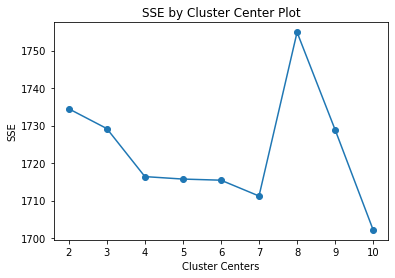

In [8]:
k_means(Information_Technology_Group, 4)

### Explore Category: BUSINESS & FINANCIAL SERVICES

In [9]:
BFS = content_selection(data_all_category, 'BUSINESS & FINANCIAL SERVICES')

Business Support Services              1077
Financial Institutions and Services     333
Construction and Civil Engineering      116
Wholesale Trade and Shipping             53
Name: IndustrySegment, dtype: int64


Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters

Suggested number of group is 8:

Cluster 0
content,service,website,personal,privacy,services,data,site,use,information

Cluster 1
management,com,company,use,new,service,data,information,services,business

Cluster 2
hundreds,featured,site,beta,plugins,php,beautiful,theme,themes,wordpress

Cluster 3
private,amazon,workloads,var,clouds,information,cisco,podcast,cloud,openstack

Cluster 4
raise,goodwill,apartment,container,multifamily,bags,recycling,trash,waste,valet

Cluster 5
care,welcome,touch,drug,medical,disability,services,outcomes,management,case

Cluster 6
sur,pour,du,en,colas,des,le,la,les,et

Cluster 7
use,email,names,hosting,daddy,registrar,website,information,domains,domain
Counter({1: 1224, 0: 303, 7: 31, 2: 15, 6: 3, 3: 1, 5: 1, 4: 1})
--------------------------------------------------

The actual number of group should be 4:

Cluster 0
cont

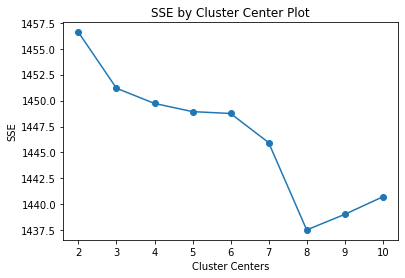

In [10]:
k_means(BFS, 4)

### Explore Category: HEALTHCARE GROUP

In [11]:
HG = content_selection(data_all_category, 'HEALTHCARE GROUP')

Biopharmaceuticals                           372
Medical Devices and Equipment                313
Healthcare Services                          189
Medical Software and Information Services    167
Name: IndustrySegment, dtype: int64


Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters

Suggested number of group is 10:

Cluster 0
fentanyl,page,billing,site,wordpress,ai,assistants,installation,iso,surgical

Cluster 1
saas,tv,app,ceo,vr,ibm,iphone,copyright,ai,manbetx

Cluster 2
clinical,services,healthcare,patient,use,patients,medical,information,health,care

Cluster 3
perfect,fraud,conversation,competitors,convert,brand,visitors,anonymous,names,business

Cluster 4
programme,bath,independent,graduate,terms,information,practice,website,veterinary,vet

Cluster 5
immunity,gsk,viral,themes,zika,wordpress,virus,influenza,vaccines,vaccine

Cluster 6
therapeutic,frequency,device,low,intensity,patch,nerve,relief,ultrasound,pain

Cluster 7
research,mr,served,company,therapeutics,clinical,development,university,cancer,dr

Cluster 8
party,services,privacy,cookies,domain,web,website,use,site,information

Cluster 9
software,google,dental,cookies,s

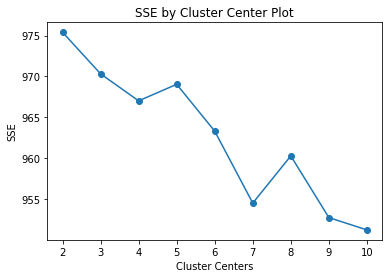

In [12]:
k_means(HG, 4)

### Explore Category: CONSUMER SERVICES GROUP

In [13]:
CSG = content_selection(data_all_category, 'CONSUMER SERVICES GROUP')

Consumer Information Services    437
Media and Content                268
Travel and Leisure               224
Retailers                        211
Name: IndustrySegment, dtype: int64


Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters

Suggested number of group is 9:

Cluster 0
time,content,website,video,new,apps,use,mobile,app,google

Cluster 1
car,agents,online,consumers,business,agent,lead,auto,leads,insurance

Cluster 2
sauce,order,salads,diego,grilled,ca,vista,project,pizza,pie

Cluster 3
business,data,site,service,services,time,com,new,use,information

Cluster 4
usa,virtual,link,alpha,delaware,ai,reality,newark,tags,vr

Cluster 5
dns,email,page,server,using,service,temple,types,mt,applies

Cluster 6
daniel,fitness,instructors,information,use,arbitration,site,workout,classes,burnalong

Cluster 7
store,return,item,free,gift,information,items,order,orders,shipping

Cluster 8
personal,privacy,content,website,terms,service,services,site,use,information
Counter({3: 865, 8: 214, 0: 32, 7: 22, 4: 3, 6: 1, 5: 1, 1: 1, 2: 1})
--------------------------------------------------

The actua

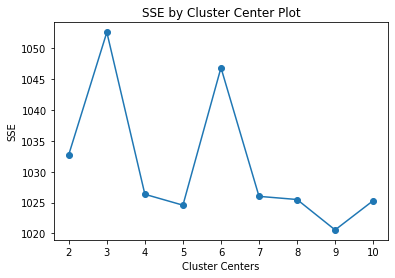

In [14]:
k_means(CSG, 4)

### Explore Category: ENERGY & UTILITIES GROUP

In [15]:
EUG = content_selection(data_all_category, 'ENERGY & UTILITIES GROUP')

Renewable Energy        103
Non-Renewable Energy     99
Utilities                17
Name: IndustrySegment, dtype: int64


Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters

Suggested number of group is 10:

Cluster 0
biogas,ge,chp,engine,power,engines,gas,jenbacher,energy,clarke

Cluster 1
mr,services,technology,business,water,company,power,oil,gas,energy

Cluster 2
production,royalty,information,stock,gross,lp,corp,hotline,memorial,rss

Cluster 3
victor,adelan,online,power,cell,microwave,maxsys,website,fuel,domain

Cluster 4
robin,renewable,brighter,turbine,tri,skystream,xzeres,turbines,energy,wind

Cluster 5
enphase,civicsolar,verengo,junction,panels,pv,solaria,power,energy,solar

Cluster 6
etagen,terms,usg,privacy,party,use,sourcegas,website,cookies,information

Cluster 7
linear,wrapper,color,webkit,gradient,border,esg,tendeka,rgba,px

Cluster 8
mining,drilling,foresight,parallel,anthracite,gas,exploration,oil,blaschak,coal

Cluster 9
stanford,copyright,info,anna,id,domain,org,amazon,enquiries,com
Counter({1: 154, 5: 

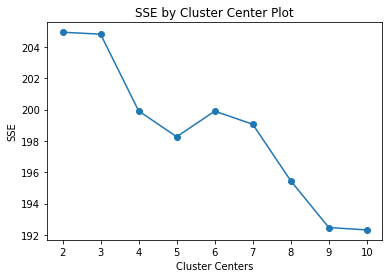

In [16]:
k_means(EUG, 3)